In [15]:
pip install evidential_deep_learning

In [16]:
import functools
import numpy as np
import matplotlib.pyplot as plt
import evidential_deep_learning as edl
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [17]:
np.random.seed(42)
n = 2000
X_data = np.linspace(-7,7,num = n)
y_data = np.sin(X_data) + 0.1* np.random.normal(size = 2000)
y1_data = np.sin(X_data)
print(y_data)

[-0.60731518 -0.665517   -0.58159373 ...  0.55817512  0.63538388
  0.58249633]


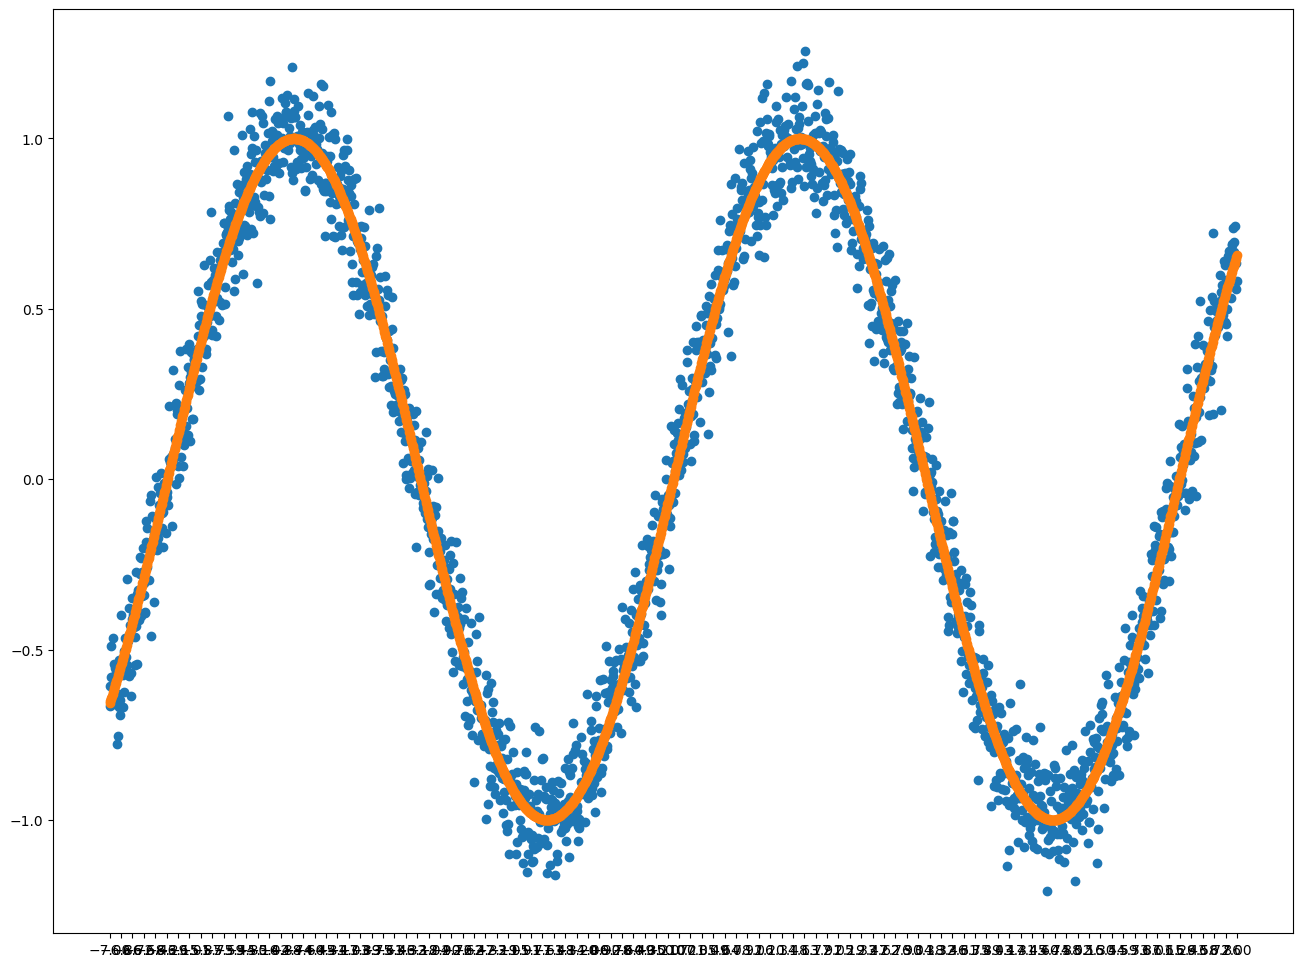

In [18]:
plt.figure(figsize=(16, 12))
plt.scatter(X_data,y_data)
plt.scatter(X_data,y1_data)
plt.xticks(np.linspace(-7,7,num = 100))
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [20]:
X_tr, X_test, y_tr, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),

        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        edl.layers.DenseNormalGamma(1),
    ])

In [21]:
def EvidentialRegressionLoss(true, pred):
        return edl.losses.EvidentialRegression(true, pred, coeff=1e-2)

model.compile(optimizer=tf.keras.optimizers.Adam(5e-4), loss=EvidentialRegressionLoss)
model.fit(X_tr, y_tr, batch_size=100, epochs=200)

Epoch 1/200
16/16 [==============================] - 3s 8ms/step - loss: 1.4137
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 1.2873
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 1.2270
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 1.1850
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1537
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1305
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1161
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1067
Epoch 9/200
16/16 [==============================] - 0s 7ms/step - loss: 1.0998
Epoch 10/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0939
Epoch 11/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0861
Epoch 12/200
16/16 [==============================] - 0s 8ms/step - loss: 1.0817
Epoch 13/200
16/16 [=================

In [22]:
sorted_indices = np.argsort(X_test)
X_test = X_test[sorted_indices]
y_pred = y_pred[sorted_indices]

y_pred = model.predict(X_test)

mu, v, alpha, beta = tf.split(y_pred, 4, axis=-1)
mu = mu[:, 0]
X_test = X_test.reshape(400,1)
# print(X_test.shape)
X_test = X_test[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))
var = np.minimum(var, 1e3)[:, 0]  # for visualization

13/13 [==============================] - 0s 2ms/step


In [23]:
sorted_indi = np.argsort(X_tr)
X_tr = X_tr[sorted_indi]
y_tr = y_tr[sorted_indi]
# y_final = np.mean(y_initial, axis=1)
# y_std = np.std(y_initial, axis=1)
# y_final_sorted = y_final[sorted_indices]
# y_std_sorted = y_std[sorted_indices]
# print(y_std)

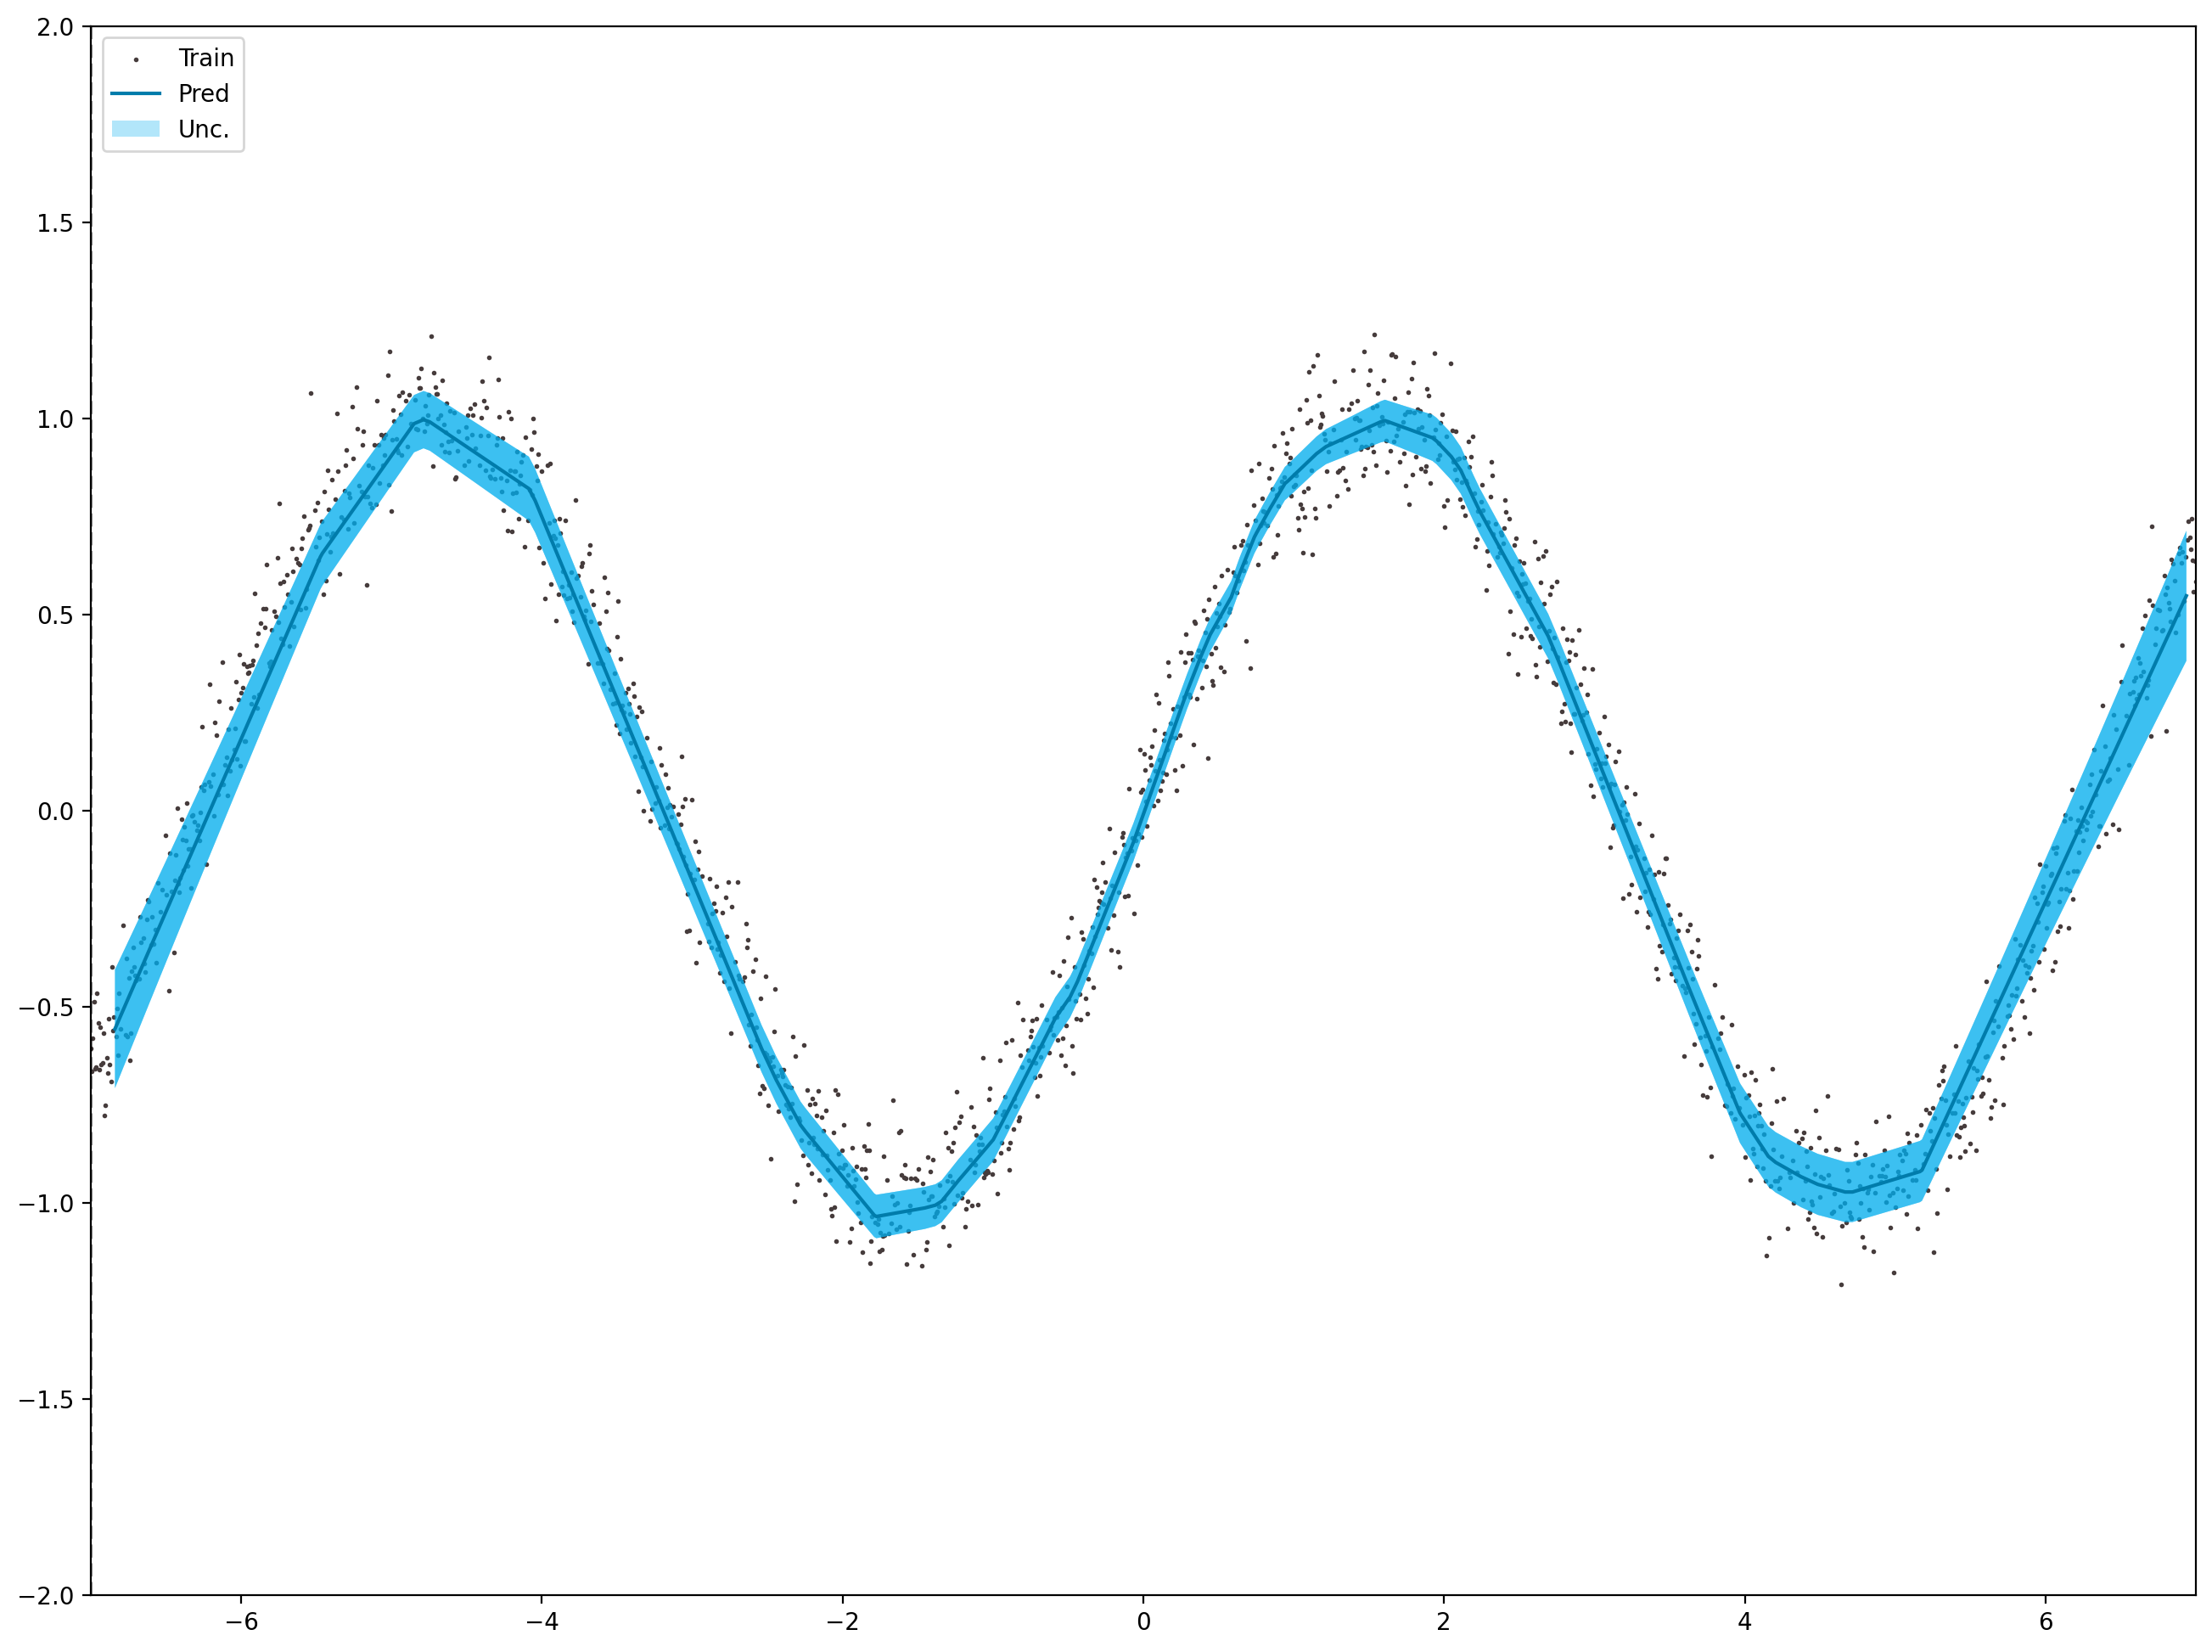

In [25]:
plt.figure(figsize=(16, 12), dpi=200)
plt.scatter(X_tr, y_tr, s=1., c='#463c3c', zorder=0, label="Train")
# plt.scatter(X_test, y_test, 'r--', zorder=2, label="True")
plt.plot(X_test, mu, color='#007cab', zorder=3, label="Pred")
plt.plot([-7, -7], [-2, 2], 'k--', alpha=0.4, zorder=0)
for k in np.linspace(0, 4, 4):
    plt.fill_between( X_test, (mu - 1 * var), (mu + 1 * var), alpha=0.3, edgecolor=None, facecolor='#00aeef', linewidth=0, zorder=1, label="Unc." if k == 0 else None)
plt.gca().set_ylim(-2, 2)
plt.gca().set_xlim(-7, 7)
plt.legend(loc="upper left")
plt.show()